# Ride Round Britain
## Bernard's Route
https://roundbritainbybike.co.uk/


In [1]:
from geopy.geocoders import Nominatim
import folium
import pandas as pd
import numpy as np

In [32]:
fn = 'the-route.xlsx'
df = pd.read_excel(fn)
df.Route

0              Putney Bridge
1       Boughton-under-Blean
2                        Rye
3                Bracklesham
4                Bournemouth
5                    Exmouth
6                 Gunnislake
7                   Falmouth
8                    St Ives
9                       Bude
10                Ilfracombe
11                  Clevedon
12                     Barry
13                  Gowerton
14                  Johnston
15                 Aberaeron
16                  Pwllheli
17                  Holyhead
18               Penrhyn Bay
19                 Southport
20                 Morecambe
21                  Holmrook
22                  Dumfries
23                  Monreith
24                Ballantrae
25                    Dunoon
26                      Oban
27                    Malaig
28                       Uig
29                 shieldaig
30                  Ullapool
31                   Kylesku
32                  Keoldale
33                    Tongue
34            

In [33]:
# List of towns in the UK
towns = df.Route.values

# Initialize geolocator
geolocator = Nominatim(user_agent="uk_towns_locator")

# Dictionary to store town coordinates
town_coordinates = {}

# Get latitude and longitude for each town
for town in towns:
    location = geolocator.geocode(town + ", UK")
    if location:
        town_coordinates[town] = (location.latitude, location.longitude)
    else:
        print(f"Could not find location for {town}")

In [45]:
# Create a map centered around the UK
uk_map = folium.Map(location=[54.0, -2.0], zoom_start=6)

# Add markers for each town
for town, coords in town_coordinates.items():
    folium.Marker(location=coords, popup=town).add_to(uk_map)


folium.PolyLine(list(town_coordinates.values())+[(51.4682995, -0.2087947)],
                color='red',
                weight=15,
                opacity=0.8).add_to(uk_map)

# Save the map to an HTML file
uk_map.save("RideRoundBritain_map.html")

print("Map has been saved as 'uk_towns_map.html'. Open it in a browser to view.")

Map has been saved as 'uk_towns_map.html'. Open it in a browser to view.


In [44]:
list(town_coordinates.values())+[(51.4682995, -0.2087947)]

[(51.4682995, -0.2087947),
 (51.2898764, 0.9396638),
 (50.9511871, 0.7327667),
 (50.7623646, -0.8588272),
 (50.7201514, -1.8799118),
 (50.6190962, -3.4146801),
 (50.5238826, -4.2161922),
 (50.1552197, -5.0688262),
 (50.2149064, -5.4795083),
 (50.8285252, -4.5469361),
 (51.2076674, -4.1254662),
 (51.4360625, -2.8526531),
 (51.4065052, -3.2666925),
 (51.6489264, -4.0356664),
 (51.755408, -4.9970891),
 (52.2431766, -4.2600153),
 (52.8879082, -4.4187565),
 (53.3106715, -4.6330966),
 (53.3178035, -3.7764476),
 (53.6475988, -3.0041751),
 (54.0721085, -2.8650938),
 (54.3835656, -3.4233817),
 (55.0691397, -3.6107936),
 (54.7372224, -4.5484106),
 (55.1014603, -5.0044737),
 (55.9481104, -4.9244868),
 (56.4120166, -5.4723731),
 (57.0061325, -5.8294488),
 (57.4757994, -6.680158),
 (57.5234507, -5.6495898),
 (57.8978237, -5.1586647),
 (58.2563273, -5.019108),
 (58.553833, -4.7841567),
 (58.4795782, -4.4173192),
 (58.4425516, -3.0915827),
 (57.6884029, -4.1692103),
 (57.7220766, -3.2814625),
 (57.14

In [37]:
df[['latitude','longitude']] = list(town_coordinates.values())

In [38]:
df.to_pickle('RideRoundBritain.pkl')

# Salesman route

In [1]:
import pandas as pd
df = pd.read_pickle('RideRoundBritain.pkl')

In [2]:
from TravellingSalesman import salesman, plot_route, find_initial_route, tweak_route

In [3]:
points = df[['longitude','latitude']].values
#route = salesman(points)

TypeError: strptime() argument 1 must be str, not <class 'time.struct_time'>

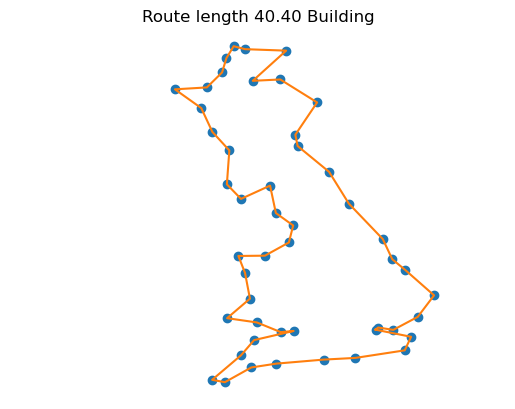

In [4]:

plot_route(points,range(49))

In [18]:
route

array([ 1, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 34, 36, 35, 33, 32, 31,
       30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 17, 19, 18, 16, 15, 13,
       10, 14,  8,  7,  9,  6,  5, 12, 11,  4,  3,  0, 48, 47,  2],
      dtype=int32)

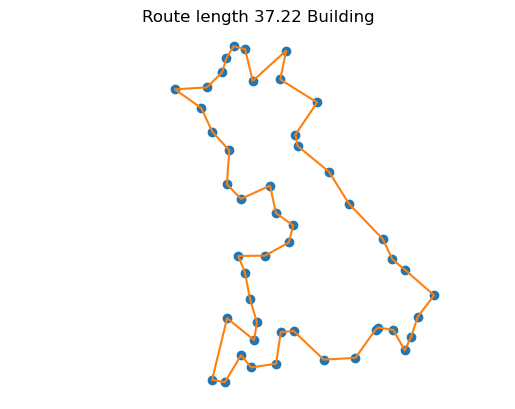

In [12]:
route = find_initial_route(points)

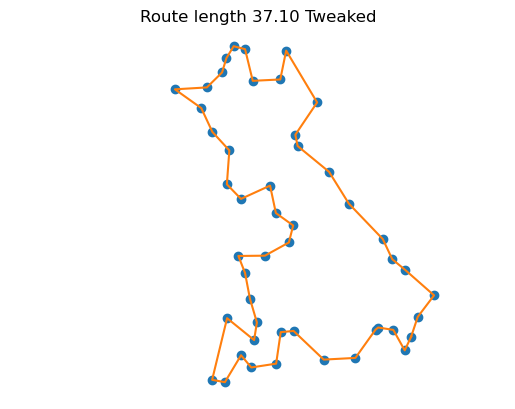

Improvements from tweaking initial route: ['37.22', '37.10']


In [13]:
route = tweak_route(route,points)

In [17]:
import glob
import imageio

In [26]:
filenames = glob.glob("ims/*.png")
filenames

['ims/1747573065113924.png',
 'ims/1747573066814753.png',
 'ims/1747573065678071.png',
 'ims/1747573068675637.png',
 'ims/1747573076895025.png',
 'ims/1747573063140824.png',
 'ims/1747573064243117.png',
 'ims/1747573072502218.png',
 'ims/1747573070207540.png',
 'ims/1747573063708225.png',
 'ims/1747573063551204.png',
 'ims/1747573073022925.png',
 'ims/1747573067095592.png',
 'ims/1747573071073323.png',
 'ims/1747573071998098.png',
 'ims/1747573068353316.png',
 'ims/1747573067384383.png',
 'ims/1747573064636731.png',
 'ims/1747573075754187.png',
 'ims/1747573074646888.png',
 'ims/1747573074101967.png',
 'ims/1747573064875941.png',
 'ims/1747573075198483.png',
 'ims/1747573069787939.png',
 'ims/1747573066240545.png',
 'ims/1747573066529184.png',
 'ims/1747573064060731.png',
 'ims/1747573065962313.png',
 'ims/1747573073561039.png',
 'ims/1747573071511775.png',
 'ims/1747573068998863.png',
 'ims/1747573077490585.png',
 'ims/1747573067690627.png',
 'ims/1747573067991518.png',
 'ims/17475730

In [27]:
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('ims/movie.gif', images)

/var/folders/23/z1fjvm2x35b5rgrj3knpwffc0000gn/T/ipykernel_69536/2061624365.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [25]:
len(images)

328

In [6]:
import time

In [13]:
f'{int(time.time() % 1 * 1e6):06d}'

'517468'

AttributeError: module 'ffmpeg' has no attribute 'input'

In [24]:
import cv2
import os

image_folder = 'ims/'
video_name = 'ims/video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()
